In [1]:
from BranchingProcess import Person, BranchingProcess, read_from_files
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
from collections import Counter
import plotly as py
import plotly.graph_objs as go
from datetime import date, timedelta,datetime

%matplotlib inline

py.tools.set_credentials_file(username='roller145', api_key='8ggrhbcyaw')

In [2]:
V = ['E', 'N', 'W', 'C', 'Q', 'G', 'R', 'F', 'O', 'I']
V = map(lambda x: x + '.txt',V)
V = list(V)
P = read_from_files(V)
num1 = len(P) 
print( 'number of processes:' + str(num1))

number of processes:68532


In [3]:
Persons = []
for proc in P:
    for gen in proc.generations:
        for per in gen:
            if ((per.birthday != '') | (per.deathdate != '')):
                Persons.append(per)


In [4]:
P = [p for p in P if len(p.generations) > 1]
num2 = len(P)
print( 'number of processes with second generation:' + str(num2))

number of processes with second generation:19769


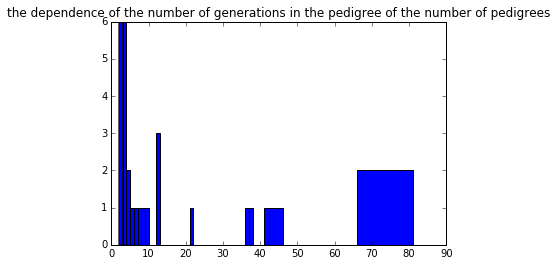

x_min = 2 x_max = 81 x_mean = 26.8666666667


In [5]:
GLen = [len(p.generations) for p in P]
cnt = Counter() 
for l in GLen:
    cnt[l] += 1
Itm = cnt.items()
Y = [num for (l,num) in Itm]
X = [l for (l,num) in Itm]
plt.title("the dependence of the number of generations in the pedigree of the number of pedigrees")
plt.hist(Y, X)
plt.show()

x_min = np.min(X)
x_max = np.max(X)
x_mean = np.mean(X)

print('x_min = '+ str(x_min) + ' x_max = '+ str(x_max) + ' x_mean = '+ str(x_mean))

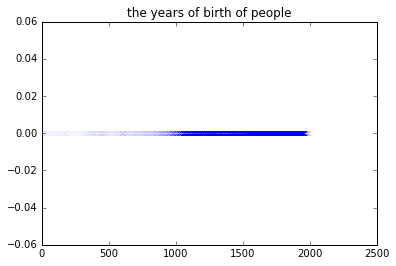

In [6]:
import timestring
from dateutil.relativedelta import relativedelta
def parse_year(str):
    s= str.split('-')
    if (s[0] != ''):
        return int(s[0])

def parse_delta(p):
    str1,str2 = p.birthday, p.deathdate
    s1 = str1.split('-')
    s2 = str2.split('-')
    if ((s2[0] == '') | (s1[0] == '')):
        return
    else:
        diff = parse_year(str2) - parse_year(str1)
        return diff

DeltaYears = []
BirthYears = []

for p in Persons:
    res = parse_delta(p)
    if (res):
        if ( (res >= 0) & (res < 150)):
            DeltaYears.append(res)
            BirthYears.append(parse_year(p.birthday))

Date = [parse_year(p.birthday) for p in Persons]
plt.title('the years of birth of people')
plt.plot(Date, np.zeros_like(Date), 'x', alpha=0.005) #it's hard to understand with bigger alpha 
plt.show()



In [7]:
biggest_life = np.max(DeltaYears)
birth_biggest = BirthYears[DeltaYears.index(biggest_life)]
smallest_life = np.min(DeltaYears)
birth_smallest = BirthYears[DeltaYears.index(smallest_life)]
mean_life = np.mean(DeltaYears)
print('biggest life = '+ str(biggest_life) + ' smallest life = '+ str(smallest_life) + ' life mean = '+ str(mean_life))
print('biggest life birthday= '+ str(birth_biggest) + ' smallest life birthday= '+ str(birth_smallest))


biggest life = 149 smallest life = 1 life mean = 60.7145136911
biggest life birthday= 1811 smallest life birthday= 1917


Так как инфомация  исходных данных недостоверна, то мы не брали во внимание людей, путешествующих во времени

In [8]:
DefaultProcess = []
for p in P:
    for i in range(len(p.generations)):
        if len(DefaultProcess) <= i:
            DefaultProcess.append(p.generations[i])
        else:
            DefaultProcess[i] = DefaultProcess[i] + p.generations[i]

In [11]:
Fem = []
for p in Persons:
    if (p.gender != 'male'):
        Fem.append(p.name)
        Persons.remove(p)
    elif (p.birthday == '' or parse_year(p.birthday) < 1950):
        Persons.remove(p)


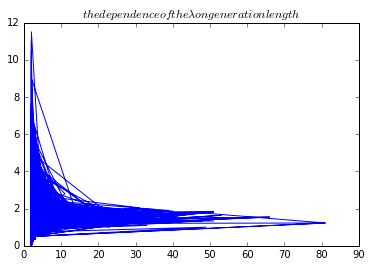

In [12]:
FemSet = set(Fem)
X = []
Y = []
for proc in P:
    PX = []
    for gen in proc.generations:
        for per in gen:
            Ch = []
            for ch in per.children:
                if (ch not in FemSet):
                    Ch.append(ch)
            PX.append(len(Ch))
    X.append(PX)
    Y.append(len(proc.generations))
Means = [np.mean(PX) for PX in X]
one_big_sum = np.sum([np.sum(XP) for XP in X ])
one_big_size = np.sum([len(XP) for XP in X])
one_big_mean = one_big_sum/one_big_size
plt.title('$the  dependence  of  the  \lambda  on  generation  length$')
plt.plot(Y,Means)
plt.show()

Так как для каждого мужчины количество его потомков-мужчин - случайная величина с Пуассоновским распределением, то ${\hat{\lambda}} = \bar{x}$, как оценка максимального правдоподобия для данного распределения (выборкой в данном случае является количество детей - мальчиков у каждого из мужчин в процессе, так как все эти с.в. независимы и одинаково распределены)

In [13]:
print(one_big_mean)

1.7201956998


Собственно, само распределение на графике ниже ($\hat\lambda = 1.72$)

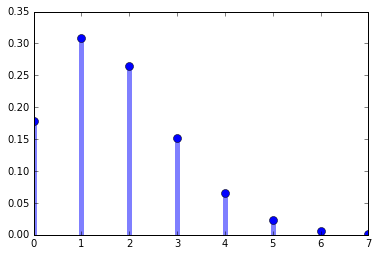

In [14]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
mu = one_big_mean
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')
x = np.arange(poisson.ppf(0.001, mu),
              poisson.ppf(0.9999, mu))
ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)
plt.show()

In [15]:
mean = np.mean([ len(DefaultProcess[i+1])/len(DefaultProcess[i]) for i in range(len(DefaultProcess) - 1)])
print(mean)

0.954869847267


In [21]:
def rand():
    return sps.poisson.rvs(one_big_mean)

next_gen = len(DefaultProcess[0])

PrevGenerations = []
counter  = 0
while(next_gen > 1) :
    ch_sum = 0
    num_gays = 0
    PG = []
    while (ch_sum < next_gen):
        num_gays += 1
        diff = rand()
        if (ch_sum + diff < next_gen):
            PG.append(diff)
            ch_sum += diff
        else:
            PG.append(next_gen - ch_sum)
            ch_sum = next_gen
    PrevGenerations.append(PG)
    next_gen = num_gays
    counter += 1
print([np.sum(PG) for PG in PrevGenerations])

[19769, 11481, 6585, 3758, 2163, 1327, 747, 403, 242, 130, 69, 41, 34, 22, 17, 12, 5, 2, 2]


In [22]:
print(len(PrevGenerations))

19
